Total de anuncios

host_since:
 - Tipo de dato
 - Cantidad de nulos
 - Cantidad de Vacios
 - Cantidad de datos unicos
 - Cantidad de datos totales

In [1]:
import pandas as pd

# Cargar únicamente la columna 'city' del archivo CSV
file_path = "../0_Dataset/Listings.csv"
data = pd.read_csv(file_path, usecols=['host_total_listings_count'], delimiter=',', encoding='latin-1')

# Verificar si la columna 'city' existe en el DataFrame
if 'host_total_listings_count' in data.columns:
    # Tipo de dato
    tipo_dato = data['host_total_listings_count'].dtype
    
    # Cantidad de nulos
    cantidad_nulos = data['host_total_listings_count'].isna().sum()
    
    # Cantidad de vacíos (considerando cadenas vacías)
    cantidad_vacios = (data['host_total_listings_count'] == '').sum()
    
    # Cantidad de datos únicos
    cantidad_unicos = data['host_total_listings_count'].nunique()
    
    # Cantidad de datos totales
    cantidad_totales = data['host_total_listings_count'].shape[0]
    
    # Imprimir resultados
    print(f"Columna 'host_total_listings_count':")
    print(f" - Tipo de dato: {tipo_dato}")
    print(f" - Cantidad de nulos: {cantidad_nulos}")
    print(f" - Cantidad de vacíos: {cantidad_vacios}")
    print(f" - Cantidad de datos únicos: {cantidad_unicos}")
    print(f" - Cantidad de datos totales: {cantidad_totales}")
    print("\nDescripción estadística de la columna:")
    print(data['host_total_listings_count'].describe())

else:
    print("La columna 'host_total_listings_count' no existe en el DataFrame.")
    print(data['host_total_listings_count'].value_counts())
    print(data['host_total_listings_count'].unique())


Columna 'host_total_listings_count':
 - Tipo de dato: float64
 - Cantidad de nulos: 165
 - Cantidad de vacíos: 0
 - Cantidad de datos únicos: 206
 - Cantidad de datos totales: 279712

Descripción estadística de la columna:
count    279547.000000
mean         24.581612
std         284.041143
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max        7235.000000
Name: host_total_listings_count, dtype: float64


Analisis Cuantitaivo:
* Promedio
* Min
* Max
* Desviacion Estandar
* Q1
* Q2
* Q3
* Q4
* Mediana
* Kurtosis
* Skewness

ANALISIS CUANTITATIVO A ESCALA REAL CON OUTLIERS Y CON 0 POR LA POSIBILIDAD DEL QUE EL ANFITRION NO CUENTE CON ANUNCIOS

In [4]:
# Cantidad de filas antes de aplicar el filtro
total_antes = data['host_total_listings_count'].shape[0]

# Filtrar valores válidos: eliminar nulos y valores iguales a 0
valores_validos = data['host_total_listings_count'].dropna()

# Cantidad de filas después de filtrar
total_despues = valores_validos.shape[0]

# Calcular cuántos valores se eliminaron (nulos o 0)
valores_dropeados = total_antes - total_despues

# Imprimir el resultado
print(f"Cantidad de valores eliminados (dropeados): {valores_dropeados}")

if not valores_validos.empty:
    # Cálculo de estadísticas en escala natural
    promedio = valores_validos.mean()
    minimo = valores_validos.min()
    maximo = valores_validos.max()
    desviacion = valores_validos.std()
    q1 = valores_validos.quantile(0.25)
    q2 = valores_validos.quantile(0.50)  # Mediana
    q3 = valores_validos.quantile(0.75)
    q4 = valores_validos.quantile(1.0)
    varianza = valores_validos.var()
    kurtosis = valores_validos.kurtosis()
    skewness = valores_validos.skew()

    # Mostrar resultados
    print("\nAnálisis Cuantitativo de 'host_total_listings_count' (escala natural,sin excluir valores 0):")
    print(f" - Promedio: {promedio:.2f}")
    print(f" - Mínimo: {minimo}")
    print(f" - Máximo: {maximo}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Q4 (100%): {q4}")
    print(f" - Varianza: {varianza}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar un análisis cuantitativo.")


Cantidad de valores eliminados (dropeados): 165

Análisis Cuantitativo de 'host_total_listings_count' (escala natural,sin excluir valores 0):
 - Promedio: 24.58
 - Mínimo: 0.0
 - Máximo: 7235.0
 - Desviación estándar: 284.04
 - Q1 (25%): 1.0
 - Q2 / Mediana (50%): 1.0
 - Q3 (75%): 4.0
 - Q4 (100%): 7235.0
 - Varianza: 80679.37093989148
 - Curtosis (Kurtosis): 586.3057
 - Asimetría (Skewness): 23.4901


ANALISIS CUANTITIVO SIN OUTLIERS Y CON 0

In [11]:
# 1. Filtrar valores válidos: eliminar nulos y valores 0
valores_validos = data['host_total_listings_count'].dropna()

# 2. Cálculo de IQR y límites
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# 3. Identificar outliers
outliers = valores_validos[(valores_validos < limite_inferior) | (valores_validos > limite_superior)]
cantidad_outliers = outliers.shape[0]

# 4. Eliminar outliers
valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# 5. Calcular estadísticas descriptivas sin outliers
if not valores_sin_outliers.empty:
    promedio = valores_sin_outliers.mean()
    minimo = valores_sin_outliers.min()
    maximo = valores_sin_outliers.max()
    desviacion = valores_sin_outliers.std()
    q1 = valores_sin_outliers.quantile(0.25)
    q2 = valores_sin_outliers.quantile(0.50)
    q3 = valores_sin_outliers.quantile(0.75)
    varianza = valores_sin_outliers.var()
    kurtosis = valores_sin_outliers.kurtosis()
    skewness = valores_sin_outliers.skew()

    # 6. Mostrar resultados
    print(f"Cantidad de outliers detectados: {cantidad_outliers}\n")
    print("Análisis Cuantitativo de 'host_total_listings_count' (escala natural, sin outliers):")
    print(f" - Promedio: {promedio:.2f}")
    print(f" - Mínimo: {minimo}")
    print(f" - Máximo: {maximo}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Varianza: {varianza:.4f}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Cantidad de outliers detectados: 42065

Análisis Cuantitativo de 'host_total_listings_count' (escala natural, sin outliers):
 - Promedio: 1.79
 - Mínimo: 0.0
 - Máximo: 8.0
 - Desviación estándar: 1.75
 - Q1 (25%): 1.0
 - Q2 / Mediana (50%): 1.0
 - Q3 (75%): 2.0
 - Varianza: 3.0528
 - Curtosis (Kurtosis): 2.7074
 - Asimetría (Skewness): 1.7386


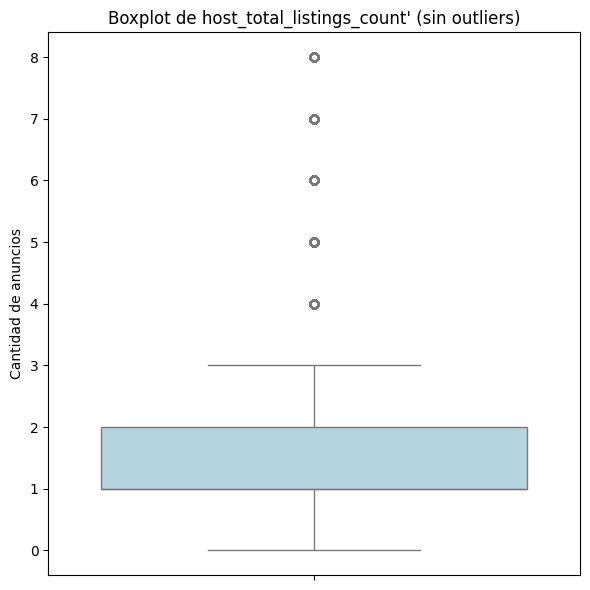

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reutilizamos los datos filtrados (sin nulos, sin ceros, sin outliers)
valores_validos = data['host_total_listings_count'].dropna()

# Cálculo del IQR
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Eliminar outliers
valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# Crear el boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(y=valores_sin_outliers, color="lightblue")
plt.title("Boxplot de host_total_listings_count' (sin outliers)")
plt.ylabel("Cantidad de anuncios")
plt.tight_layout()
plt.show()
